# Keras - ANN(Artificial Neural Network)

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "keras_multilayer_perceptron"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
        
import warnings
warnings.filterwarnings(action='ignore')

## 설치 확인

In [2]:
import tensorflow as tf
from tensorflow import keras

print('텐서 플로 버전:', tf.__version__)
print('케라스 버전:', keras.__version__)

텐서 플로 버전: 2.5.0
케라스 버전: 2.5.0


## Sequential API 를 사용하여 이미지 분류기 만들기

### 패션 MNIST 데이터 가져오기

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### 훈련 데이터 확인

In [4]:
print('데이터 구조:', X_train_full.shape)

print('데이터 타입:', X_train_full.dtype)

데이터 구조: (60000, 28, 28)
데이터 타입: uint8


### 훈련 데이터 와 테스트 데이터를 나누고 0~1 사이로 스케일링

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

### 이미지 출력

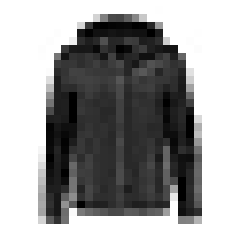

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### 레이블 생성

In [7]:
print(y_train) #0 ~ 9

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

[4 0 7 ... 3 0 5]
Coat


### 데이터 개수 확인

In [8]:
print('학습 데이터:', X_train_full.shape)
print('테스트 데이터:', X_test.shape)
print('검증 데이터:', X_valid.shape)

학습 데이터: (60000, 28, 28)
테스트 데이터: (10000, 28, 28)
검증 데이터: (5000, 28, 28)


### 샘플 이미지 출력

그림 저장: fashion_mnist_plot


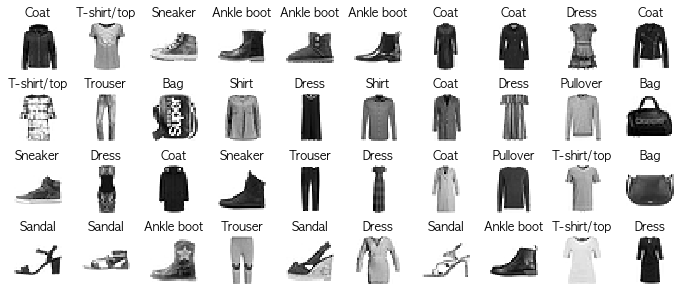

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### 시퀀셜 API를 사용하여 모델 만들기

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
#루프에서 많은 모델을 생성하는 경우이 전역 상태는 시간이 지남에 따라 증가하는 메모리를 소비하므로이를 지울 수 있습니다. 
#clear_session() 호출 하면 전역 상태가 해제됩니다. 
#이는 특히 메모리가 제한된 경우 이전 모델 및 레이어의 혼란을 방지하는 데 도움이됩니다.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
#층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달해도 됨
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 모델을 이미지로 출력

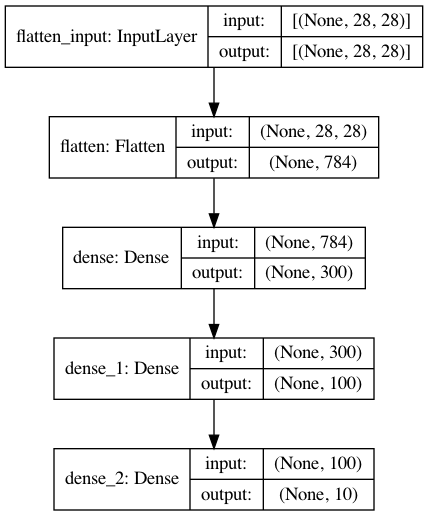

In [15]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### 인덱스를 이용해서 층의 이름을 확인하기

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer(hidden1.name) is hidden1

True

In [18]:
### 파라미터 확인

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

### 모델 컴파일

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 모델 훈련

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7237 - accuracy: 0.7645 - val_loss: 0.5207 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4844 - accuracy: 0.8318 - val_loss: 0.4350 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4394 - accuracy: 0.8455 - val_loss: 0.5325 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4128 - accuracy: 0.8566 - val_loss: 0.3921 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3943 - accuracy: 0.8621 - val_loss: 0.3747 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3755 - accuracy: 0.8673 - val_loss: 0.3711 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3637 - accuracy: 0.8716 - val_loss: 0.3609 - val_accuracy:

### History 객체

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 학습 곡선

그림 저장: keras_learning_curves_plot


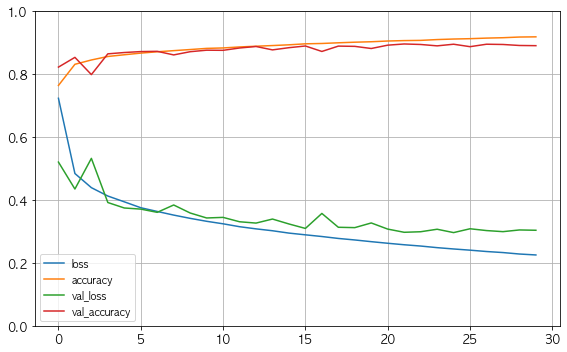

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

### 일반화 오차

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 956us/step - loss: 0.3366 - accuracy: 0.8831


[0.33662697672843933, 0.8830999732017517]

### 예측

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림 저장: fashion_mnist_images_plot


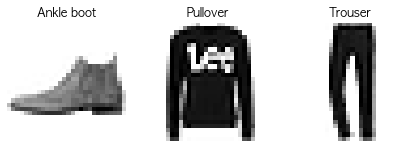

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## 회귀용 다층 퍼셉트론 만들기

### 데이터 가져오기

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

### 모델 만들기

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 835us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 687us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 632us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 820us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 738us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 664us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 622us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 623us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 613us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 618us/step - loss: 0.487

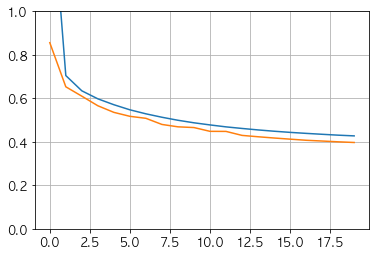

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

## 함수형 API

### 모델 만들기

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

### 모델 확인

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

### 모델 훈련

In [44]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 963us/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 822us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 689us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 704us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 692us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 682us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 678us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 686us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 678us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 698us/step - loss: 0.465

### 짧은 경로로 보내기

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

### 모델을 훈련

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 955us/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 719us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 790us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 734us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 742us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 769us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 723us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 760us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 719us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 731us/step - loss: 0.464

### 규제를 위한 보조 출력 추가

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

#보초 출력 추가하기
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

### 규제가 추가된 모델 컴파일

In [48]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

### 모델 훈련

In [49]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 972us/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 887us/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 921us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 868us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - 

### 모델 평가

In [50]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 599us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


## 상속(SubClassing)을 이용한 방식

In [51]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [52]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 941us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 894us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 866us/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 906us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.596

## 모델 저장 과 복원

In [53]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [54]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 893us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 698us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 713us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 713us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 822us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 884us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 938us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 737us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 723us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 504us/step - loss: 0.438

In [55]:
model.save("my_keras_model.h5")

In [56]:
model = keras.models.load_model("my_keras_model.h5")

In [57]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

### 체크 포인트 생성 및 로드

In [58]:
model.save_weights("my_keras_weights.ckpt")

In [59]:
model.load_weights("my_keras_weights.ckpt")

### 훈련 과정에서 콜백 사용하기

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 902us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 729us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 729us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 728us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 721us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 695us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 681us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 705us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 681us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 485us/step - loss: 0.438

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 889us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 690us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 716us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 731us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 715us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 682us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 693us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 676us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 737us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 721us/step - l

Epoch 80/100
363/363 [==============================] - 0s 734us/step - loss: 0.3329 - val_loss: 0.3353
Epoch 81/100
363/363 [==============================] - 0s 684us/step - loss: 0.3324 - val_loss: 0.3276
Epoch 82/100
363/363 [==============================] - 0s 714us/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 938us/step - loss: 0.3317 - val_loss: 0.3281
Epoch 84/100
363/363 [==============================] - 0s 788us/step - loss: 0.3312 - val_loss: 0.3636
Epoch 85/100
363/363 [==============================] - 0s 686us/step - loss: 0.3310 - val_loss: 0.3175
Epoch 86/100
363/363 [==============================] - 0s 696us/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 783us/step - loss: 0.3305 - val_loss: 0.3532
Epoch 88/100
363/363 [==============================] - 0s 783us/step - loss: 0.3299 - val_loss: 0.3256
Epoch 89/100
363/363 [==============================] - 0s 814us

In [63]:
#사용자 정의 콜백
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [64]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 895us/step - loss: 0.3302 - val_loss: 0.3559

val/train: 1.08


## 텐서보드를 이용한 시각화

In [65]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_07_07-08_05_25'

In [66]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#텐서보드 저장
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 937us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 998us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 727us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 861us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 938us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 879us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 887us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 883us/step - loss: 0.4474 - 

### 텐서보드 실행

In [67]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [75]:
#스칼라, 히스토그램, 이미지, 오디오, 텍스트 기록
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir) 
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # 몇몇 랜덤 데이터 
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # 32x32 RGB 이미지
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)] 
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step) 
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1]) 
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [68]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2021_07_07-08_15_53'

In [69]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])


Epoch 1/30
363/363 [==============================] - 1s 997us/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 0s 735us/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 0s 821us/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 0s 728us/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 0s 681us/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 0s 723us/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 0s 794us/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 0s 785us/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 0s 740us/step - loss: 0.89

## 신경망 하이퍼파라미터 튜닝

### 함수 생성

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

### 객체 생성

In [77]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

### 모델 훈련

In [78]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 922us/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 805us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 959us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 741us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 827us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 669us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 857us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 750us/step - loss

In [79]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3412


In [80]:
y_pred = keras_reg.predict(X_new)

### 하이퍼 파라미터 튜닝

In [81]:
np.random.seed(42)
tf.random.set_seed(42)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 752us/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 937us/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 891us/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 734us/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 714us/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 737us/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 750us/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 996us/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
2

242/242 [==============================] - 0s 760us/step - loss: 0.5671 - val_loss: 0.5266
Epoch 25/100
242/242 [==============================] - 0s 779us/step - loss: 0.5614 - val_loss: 0.5214
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5558 - val_loss: 0.5166
Epoch 27/100
242/242 [==============================] - 0s 922us/step - loss: 0.5504 - val_loss: 0.5116
Epoch 28/100
242/242 [==============================] - 0s 871us/step - loss: 0.5453 - val_loss: 0.5076
Epoch 29/100
242/242 [==============================] - 0s 927us/step - loss: 0.5403 - val_loss: 0.5035
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5356 - val_loss: 0.4989
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5309 - val_loss: 0.4946
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5265 - val_loss: 0.4915
Epoch 33/100
242/242 [==============================] - 0s 937us/step - loss: 0.5222 

Epoch 51/100
242/242 [==============================] - 0s 989us/step - loss: 0.4716 - val_loss: 0.4468
Epoch 52/100
242/242 [==============================] - 0s 943us/step - loss: 0.4693 - val_loss: 0.4446
Epoch 53/100
242/242 [==============================] - 0s 895us/step - loss: 0.4670 - val_loss: 0.4420
Epoch 54/100
242/242 [==============================] - 0s 789us/step - loss: 0.4649 - val_loss: 0.4394
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4628 - val_loss: 0.4373
Epoch 56/100
242/242 [==============================] - 0s 900us/step - loss: 0.4607 - val_loss: 0.4349
Epoch 57/100
242/242 [==============================] - 0s 942us/step - loss: 0.4588 - val_loss: 0.4330
Epoch 58/100
242/242 [==============================] - 0s 992us/step - loss: 0.4569 - val_loss: 0.4311
Epoch 59/100
242/242 [==============================] - 0s 917us/step - loss: 0.4550 - val_loss: 0.4291
Epoch 60/100
242/242 [==============================] - 0s 986us/s

242/242 [==============================] - 0s 840us/step - loss: 0.4374 - val_loss: 0.4189
Epoch 11/100
242/242 [==============================] - 0s 844us/step - loss: 0.4266 - val_loss: 0.4438
Epoch 12/100
242/242 [==============================] - 0s 913us/step - loss: 0.4188 - val_loss: 0.4250
Epoch 13/100
242/242 [==============================] - 0s 974us/step - loss: 0.4121 - val_loss: 0.4009
Epoch 14/100
242/242 [==============================] - 0s 905us/step - loss: 0.4067 - val_loss: 0.4403
Epoch 15/100
242/242 [==============================] - 0s 902us/step - loss: 0.4025 - val_loss: 0.4014
Epoch 16/100
242/242 [==============================] - 0s 987us/step - loss: 0.3981 - val_loss: 0.4247
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3946 - val_loss: 0.3964
Epoch 18/100
242/242 [==============================] - 0s 990us/step - loss: 0.3914 - val_loss: 0.3974
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3

242/242 [==============================] - 0s 1ms/step - loss: 0.3358 - val_loss: 0.3322
Epoch 29/100
242/242 [==============================] - 0s 944us/step - loss: 0.3332 - val_loss: 0.3982
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3323 - val_loss: 0.3431
Epoch 31/100
242/242 [==============================] - 0s 874us/step - loss: 0.3294 - val_loss: 0.3346
Epoch 32/100
242/242 [==============================] - 0s 841us/step - loss: 0.3279 - val_loss: 0.3637
Epoch 33/100
242/242 [==============================] - 0s 991us/step - loss: 0.3271 - val_loss: 0.3467
Epoch 34/100
242/242 [==============================] - 0s 964us/step - loss: 0.3243 - val_loss: 0.3582
Epoch 35/100
242/242 [==============================] - 0s 936us/step - loss: 0.3245 - val_loss: 0.3141
Epoch 36/100
242/242 [==============================] - 0s 912us/step - loss: 0.3223 - val_loss: 0.3636
Epoch 37/100
242/242 [==============================] - 0s 910us/step - loss: 0.3

Epoch 22/100
242/242 [==============================] - 0s 828us/step - loss: 0.4027 - val_loss: 0.4032
Epoch 23/100
242/242 [==============================] - 0s 823us/step - loss: 0.4002 - val_loss: 0.4039
Epoch 24/100
242/242 [==============================] - 0s 968us/step - loss: 0.3981 - val_loss: 0.3764
Epoch 25/100
242/242 [==============================] - 0s 911us/step - loss: 0.3962 - val_loss: 0.4241
Epoch 26/100
242/242 [==============================] - 0s 812us/step - loss: 0.3944 - val_loss: 0.3779
Epoch 27/100
242/242 [==============================] - 0s 774us/step - loss: 0.3925 - val_loss: 0.4126
Epoch 28/100
242/242 [==============================] - 0s 829us/step - loss: 0.3910 - val_loss: 0.3967
Epoch 29/100
242/242 [==============================] - 0s 881us/step - loss: 0.3889 - val_loss: 0.4045
Epoch 30/100
242/242 [==============================] - 0s 812us/step - loss: 0.3880 - val_loss: 0.3748
Epoch 31/100
242/242 [==============================] - 0s 779us

Epoch 40/100
242/242 [==============================] - 0s 782us/step - loss: 0.3763 - val_loss: 0.6416
Epoch 41/100
242/242 [==============================] - 0s 822us/step - loss: 0.3785 - val_loss: 0.3847
Epoch 42/100
242/242 [==============================] - 0s 799us/step - loss: 0.3729 - val_loss: 0.5255
Epoch 43/100
242/242 [==============================] - 0s 863us/step - loss: 0.3744 - val_loss: 0.7023
Epoch 44/100
242/242 [==============================] - 0s 818us/step - loss: 0.3741 - val_loss: 0.7508
Epoch 45/100
121/121 [==============================] - 0s 566us/step - loss: 0.3745
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=   9.5s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0682 - val_loss: 6.4183
Epoch 2/100
242/242 [==============================] - 0s 942us/step - loss: 0.7154 - val_loss: 16.7917
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5830 - val_loss: 4.782

Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2541 - val_loss: 0.3401
Epoch 74/100
242/242 [==============================] - 0s 968us/step - loss: 0.2534 - val_loss: 0.2755
Epoch 75/100
242/242 [==============================] - 0s 942us/step - loss: 0.2530 - val_loss: 0.3753
Epoch 76/100
242/242 [==============================] - 0s 967us/step - loss: 0.2526 - val_loss: 0.2755
Epoch 77/100
242/242 [==============================] - 0s 899us/step - loss: 0.2539 - val_loss: 0.3902
Epoch 78/100
121/121 [==============================] - 0s 517us/step - loss: 0.3093
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  19.3s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8717 - val_loss: 0.7369
Epoch 2/100
242/242 [==============================] - 0s 920us/step - loss: 0.5007 - val_loss: 0.4431
Epoch 3/100
242/242 [==============================] - 0s 807us/step - loss: 0.4272 - val_loss: 0.3919


Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.5328
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3842 - val_loss: 0.3609
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3729 - val_loss: 0.4151
Epoch 7/100
242/242 [==============================] - 0s 961us/step - loss: 0.3659 - val_loss: 0.3580
Epoch 8/100
242/242 [==============================] - 0s 844us/step - loss: 0.3596 - val_loss: 0.3516
Epoch 9/100
242/242 [==============================] - 0s 924us/step - loss: 0.3528 - val_loss: 0.3983
Epoch 10/100
242/242 [==============================] - 0s 989us/step - loss: 0.3511 - val_loss: 0.3323
Epoch 11/100
242/242 [==============================] - 0s 949us/step - loss: 0.3445 - val_loss: 0.4228
Epoch 12/100
242/242 [==============================] - 0s 929us/step - loss: 0.3420 - val_loss: 0.3283
Epoch 13/100
242/242 [==============================] - 0s 889us/step - loss

242/242 [==============================] - 0s 962us/step - loss: 0.3423 - val_loss: 0.8909
Epoch 27/100
242/242 [==============================] - 0s 966us/step - loss: 0.3448 - val_loss: 0.4864
Epoch 28/100
242/242 [==============================] - 0s 973us/step - loss: 0.3369 - val_loss: 0.6169
Epoch 29/100
242/242 [==============================] - 0s 968us/step - loss: 0.3373 - val_loss: 0.3470
Epoch 30/100
242/242 [==============================] - 0s 938us/step - loss: 0.3327 - val_loss: 0.5750
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3332 - val_loss: 0.3685
Epoch 32/100
242/242 [==============================] - 0s 814us/step - loss: 0.3308 - val_loss: 0.7292
Epoch 33/100
121/121 [==============================] - 0s 484us/step - loss: 0.3362
[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=   8.3s
Epoch 1/100
363/363 [==============================] - 1s 988us/step - loss: 0.8194 - val_loss: 1.8036
Epoch 2/1

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f90dd4ae280>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.0...
                                                          0.00502142573

In [82]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [83]:
rnd_search_cv.best_score_

-0.31833014885584515

In [84]:
rnd_search_cv.best_estimator_

In [85]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 629us/step - loss: 0.3029


-0.30288204550743103

In [86]:
model = rnd_search_cv.best_estimator_.model
model

In [87]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3029


0.30288204550743103